<a href="https://colab.research.google.com/github/Danielsofiap/ML-project/blob/main/Rese%C3%B1as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Santiago Coronado
*   Daniela Nath
*   Daniel Sofia Peñuela

EJERCICIO RESEÑA DE PELICULAS

In [1]:
import pandas as pd
import numpy as np
import string
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

In [8]:
## subir base de datos
df = pd.read_csv('/content/_RESEÑA.xlsx - Sheet1.csv')

In [9]:
print(df.head())

   ID                                            REVIEWS  FEELINGS
0   1     Good movie forsure is setting up the next one!  Positive
1   2  Quite a good film, but unfortunately it turned...  Negative
2   3  I loved everything about the movie !!! Just as...  Positive
3   4  Slow, no storyline. Expected better from the P...  Negative
4   5  Boring as hell. My favorite part was when it e...  Negative


In [15]:
##limpieza de datos

def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Elimina HTML
    text = re.sub(r'[^\w\s]', '', text)  # Elimina puntuación
    text = text.lower()  # Convierte a minúsculas
    return text

df['REVIEWS'] = df['REVIEWS'].apply(clean_text)
print("Datos después de la limpieza de texto:")
print(df.head())



Datos después de la limpieza de texto:
   ID                                            REVIEWS  FEELINGS
0   1      good movie forsure is setting up the next one  Positive
1   2  quite a good film but unfortunately it turned ...  Negative
2   3  i loved everything about the movie  just as gr...  Positive
3   4  slow no storyline expected better from the pla...  Negative
4   5  boring as hell my favorite part was when it ended  Negative


Vectorización

In [16]:
# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)

# Ajustar y transformar los datos de entrenamiento
X = vectorizer.fit_transform(df['REVIEWS'])

# Las etiquetas
y = df['FEELINGS']

Modelo

Puntajes de Validación Cruzada: [0.66666667 0.66666667 0.66666667 0.66666667 0.5       ]
Puntaje Promedio de Validación Cruzada: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


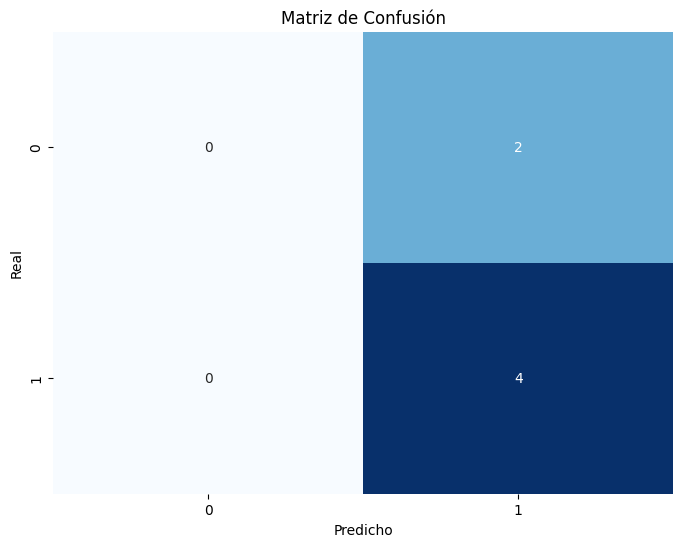

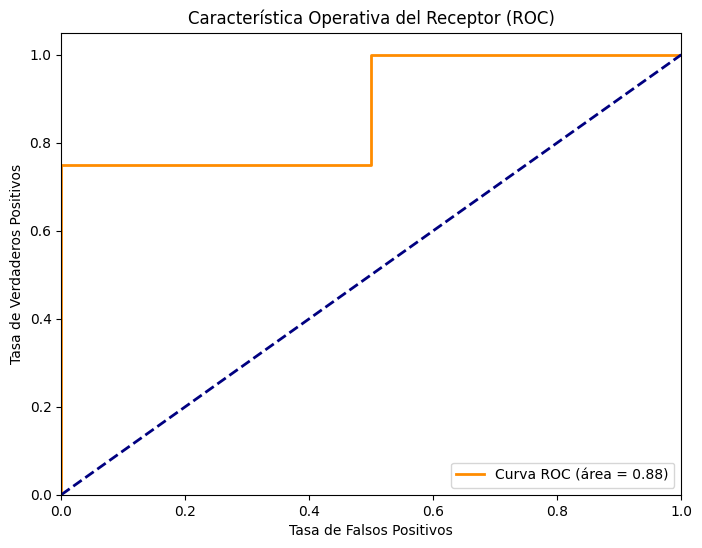

Exactitud: 0.6666666666666666

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6


Matriz de Confusión:
 [[0 2]
 [0 4]]


In [17]:
# Codificar la variable categórica FEELINGS
le = LabelEncoder()
df['FEELINGS'] = le.fit_transform(df['FEELINGS'])

# Separa las variables independientes (reseñas) y la variable objetivo (sentimiento)
X = df['REVIEWS']
y = df['FEELINGS']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocesamiento de texto: vectorización TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entrenamiento del modelo de Regresión Logística
modelo = LogisticRegression()
modelo.fit(X_train_tfidf, y_train)

# Validación cruzada
puntajes_validacion_cruzada = cross_val_score(modelo, X_train_tfidf, y_train, cv=5)
print("Puntajes de Validación Cruzada:", puntajes_validacion_cruzada)
print("Puntaje Promedio de Validación Cruzada:", np.mean(puntajes_validacion_cruzada))

# Predicción
y_prediccion = modelo.predict(X_test_tfidf)

# Evaluación del modelo
exactitud = accuracy_score(y_test, y_prediccion)
informe_clasificacion = classification_report(y_test, y_prediccion)
matriz_confusion = confusion_matrix(y_test, y_prediccion)

# Gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Gráfica de la curva ROC
probabilidad_y = modelo.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, umbrales = roc_curve(y_test, probabilidad_y)
area_bajo_curva_roc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % area_bajo_curva_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica Operativa del Receptor (ROC)')
plt.legend(loc='lower right')
plt.show()

# Imprimir las métricas de evaluación
print("Exactitud:", exactitud)
print("\nInforme de Clasificación:\n", informe_clasificacion)
print("\nMatriz de Confusión:\n", matriz_confusion)

Prueba occuracy

In [18]:
# Calcular la precisión del modelo
precision_modelo = accuracy_score(y_test, y_prediccion)

# Realizar la prueba de si la precisión es mayor que 0.82
if precision_modelo > 0.82:
    print("El modelo cumple con el requisito de precisión (> 0.82).")
else:
    print("El modelo no cumple con el requisito de precisión (> 0.82).")

El modelo no cumple con el requisito de precisión (> 0.82).


In [19]:

import pickle

# Guardar el modelo y el vectorizador
with open('logistic_model.pkl', 'wb') as model_file:
    pickle.dump(modelo, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

In [21]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00


In [22]:
pip install streamlit -q

In [23]:
pip install streamlit-lottie

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.4/802.4 kB 8.2 MB/s eta 0:00:00


In [24]:
%%writefile app.py

Writing app.py


In [25]:
import streamlit as st
import numpy as np
import pickle
from bs4 import BeautifulSoup
import re

In [27]:
# Cargar el modelo y el vectorizador TF-IDF
with open('logistic_model.pkl', 'rb') as model_file:
    modelo = pickle.load(model_file)

with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)

st.title("Predict Reviews' Sentiment")

# Entrada de la reseña
review = st.text_input("Ingrese la reseña:")

if st.button("Predicción"):
    # Preprocesar y vectorizar la reseña
    review_cleaned = BeautifulSoup(review, "html.parser").get_text()
    review_cleaned = re.sub(r'[^\w\s]', '', review_cleaned)
    review_cleaned = review_cleaned.lower()
    review_vectorized = tfidf_vectorizer.transform([review_cleaned])

     # Predicción
    pred = modelo.predict(review_vectorized)[0]

    if pred == 0:
        st.write("La reseña es Negativa")
    else:
        st.write("La reseña es Positiva")

2024-05-29 21:16:44.617 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-05-29 21:16:44.626 Session state does not function when running a script without `streamlit run`
